# Probability Distributions
Part of the Bayesian neural networks via MCMC: a Python-based tutorial

This section of the tutorial covers the some basic types of probability distributions.

In [2]:
import numpy as np
from numpy import random
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from math import sqrt
from scipy.stats import norm, gamma, invgamma

In [10]:
# set plot styling
sns.set_style('white')
sns.set_context('paper')
# set random seed
np.random.seed(2022)

In [3]:
def plot_distributions(x_data, pdf_data,title=''):
    '''
    Construct a matplotlib plot comparing the pdf_data.
    Inputs:
        x_data: 1d array of x values
        pdf_data: dict of {label: probability density values}
    '''
    plt.title(title)
    for label, pdf in pdf_data.items():
        plt.plot(x_data, pdf, label=label)
    plt.legend()
    plt.xlabel(r"$x$")
    plt.ylabel(r"$f(x)$")

## Normal distribution
Gaussian PDF with parameters mean ($\mu$) and standard deviation ($\sigma$):
$$
f(x) = \frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^2}
$$

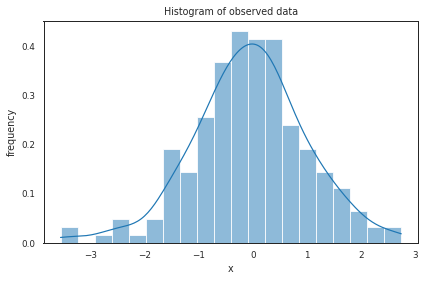

In [58]:
data = np.random.randn(200)

# histogram using seaborn (sns)
# plotting using random number generation
ax = plt.subplot()
sns.histplot(data, kde=True, bins=20, ax=ax, stat="density") # smooth using KDE: https://en.wikipedia.org/wiki/Kernel_density_estimation
_ = ax.set(title='Histogram of observed data', xlabel='x', ylabel='frequency');
plt.tight_layout()
plt.show()
None

### Compare normal distributions of different parameters
First we will use a fixed mean, varying the standard deviation.

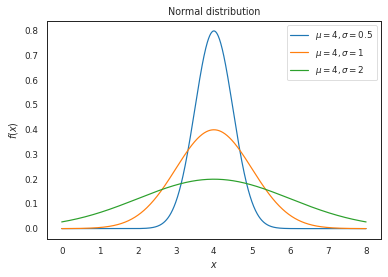

In [11]:
# Comparing 
# same mean, different standard deviations
x = np.linspace(0, 8, 1000)
pdf_data = {
    r'$\mu = 4, \sigma = 0.5$': norm.pdf(x, 4, 0.5),
    r'$\mu = 4, \sigma = 1$': norm.pdf(x, 4, 1),
    r'$\mu = 4, \sigma = 2$': norm.pdf(x, 4, 2),
}
plot_distributions(
    x, 
    pdf_data, 
    title='Normal distribution'
)

Now varying both the mean and variance ($\sigma^2$)

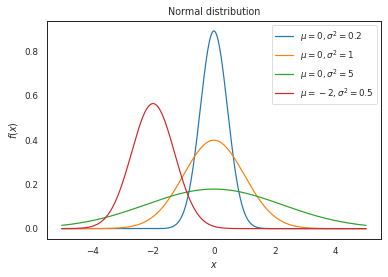

In [13]:
x = np.linspace(-5, 5, 1000)
pdf_data = {
    r'$\mu = 0, \sigma^2 = 0.2$': norm.pdf(x, 0, sqrt(0.2)),
    r'$\mu = 0, \sigma^2 = 1$': norm.pdf(x, 0, sqrt(1)),
    r'$\mu = 0, \sigma^2 = 5$': norm.pdf(x, 0, sqrt(5)),
    r'$\mu = -2, \sigma^2 = 0.5$': norm.pdf(x, -2, sqrt(0.5)),
}

plot_distributions(
    x,
    pdf_data,
    title='Normal distribution'
)

## Gamma distribution
Gamma distribution PDF with parameters shape ($\alpha$) and rate ($\beta$):
$$
f(x;\alpha,\beta) = \frac{ \beta^\alpha x^{\alpha-1} e^{-\beta x}}{\Gamma(\alpha)}
$$
For the numpy implementation, scale = 1 / rate

https://numpy.org/doc/stable/reference/random/generated/numpy.random.gamma.html

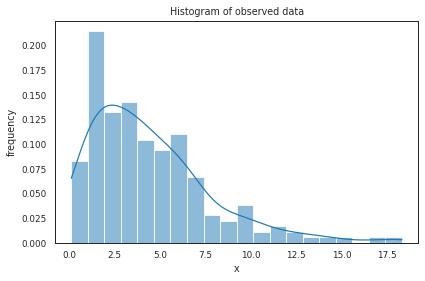

In [34]:
shape, scale = 2, 2
s_gamma = np.random.gamma(shape, scale, 200)

ax = plt.subplot()
sns.histplot(s_gamma, kde=True, ax=ax, bins=20, stat="density") # smooth using KDE: https://en.wikipedia.org/wiki/Kernel_density_estimation
_ = ax.set(title='Histogram of observed data', xlabel='x', ylabel='frequency');
plt.tight_layout()
plt.show()
None

Gamma distribution with different parameters

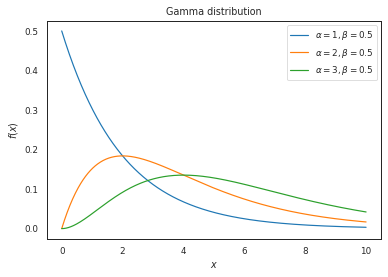

In [22]:
x = np.linspace(0, 10, 1000)

pdf_data = {
    r'$\alpha = 1, \beta = 0.5$': gamma.pdf(x, a = 1, scale = 2),
    r'$\alpha = 2, \beta = 0.5$': gamma.pdf(x, a = 2, scale = 2),
    r'$\alpha = 3, \beta = 0.5$': gamma.pdf(x, a = 3, scale = 2),
}

plot_distributions(
    x,
    pdf_data,
    title='Gamma distribution'
)

The inverse gamma distribution is defined by the shape ($\alpha$) and scale ($\beta$) paramaters:
$$
f(x;\alpha,\beta) = \frac{\beta^\alpha}{\Gamma(\alpha)}\left(\frac{1}{x}\right)^{\alpha+1}e^{-\frac{\beta}{x}}
$$

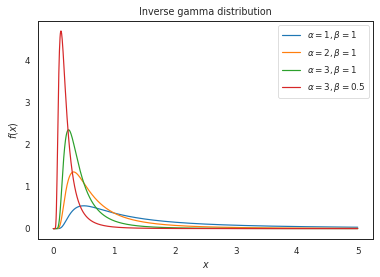

In [25]:
x = np.linspace(0, 5, 1000)

pdf_data = {
    r'$\alpha = 1, \beta = 1$': invgamma.pdf(x, a = 1, scale = 1),
    r'$\alpha = 2, \beta = 1$': invgamma.pdf(x, a = 2, scale = 1),
    r'$\alpha = 3, \beta = 1$': invgamma.pdf(x, a = 3, scale = 1),
    r'$\alpha = 3, \beta = 0.5$': invgamma.pdf(x, a = 3, scale = 0.5)
}

plot_distributions(
    x,
    pdf_data,
    title='Inverse gamma distribution'
)

## Uniform distribution
Uniform distribution https://numpy.org/doc/stable/reference/random/generated/numpy.random.uniform.html

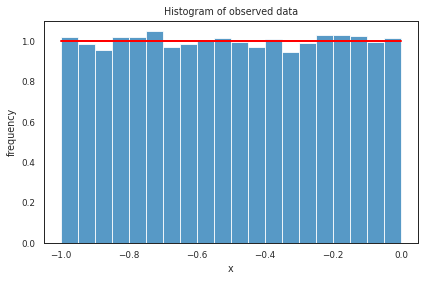

In [53]:
s_uniform = np.random.uniform(-1,0,20000) # -1 and 0 give limits

ax = plt.subplot()
sns.histplot(s_uniform, kde=False, ax=ax, bins=20, stat="density") # smooth using KDE: https://en.wikipedia.org/wiki/Kernel_density_estimation
_, bins = np.histogram(s_uniform, bins=20)
plt.plot(bins, np.ones_like(bins), linewidth=2, color='r')
_ = ax.set(title='Histogram of observed data', xlabel='x', ylabel='frequency');
plt.tight_layout()
plt.show()
None